In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from scipy import stats
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['fast'])
plt.style.use(['seaborn-poster'])
print(plt.style.available)

DATA_FOLDER = "/data/cubes/"
DATA_PATH = os.path.abspath(os.getcwd()) + DATA_FOLDER
invalid_participants = [1,4,18]

['dark_background', 'seaborn-colorblind', 'seaborn-talk', 'seaborn-paper', 'seaborn-deep', 'seaborn-poster', 'fast', 'bmh', 'seaborn-whitegrid', 'ggplot', 'seaborn-ticks', 'seaborn-darkgrid', 'seaborn-pastel', '_classic_test', 'seaborn-notebook', 'classic', 'seaborn-white', 'fivethirtyeight', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-muted', 'seaborn', 'grayscale', 'seaborn-bright', 'Solarize_Light2']


In [2]:
# Iterate over files and find csv files that have allocation of cubes for each participant
dfs = []

for path in Path(DATA_PATH).rglob('participant_*.csv'):
    participant_id = int(re.search(r'\d+', path.name).group())
    if participant_id in invalid_participants:
        continue
    temp = pd.read_csv(path)
    temp["scene"] = temp["scene"].str[-1:]
    temp["scene"] = temp["scene"].astype('int')
    temp["participant"] = participant_id
    temp["NVC_A"] = False
    temp["NVC_B"] = False
    
    if int(participant_id) % 2 == 0:
        nvc = "A"
        temp["NVC_A"] = True
    else:
        nvc = "B"
        temp["NVC_B"] = True

    temp["NVC"] = nvc
    dfs.append(temp)


raw_data = pd.concat(dfs, axis=0, ignore_index=True)

In [3]:
raw_data.head()

,scene,robot_a,robot_b,participant,NVC_A,NVC_B,NVC
0,0,1,1,2,True,False,A
1,1,2,1,2,True,False,A
2,2,2,2,2,True,False,A
3,3,0,3,2,True,False,A
4,4,4,2,2,True,False,A


In [4]:
odd_participants_data = raw_data[raw_data["participant"] % 2 != 0]
odd_participants_data = odd_participants_data[odd_participants_data["scene"] >= 1]
even_participants_data = raw_data[raw_data["participant"] % 2 == 0]
even_participants_data = even_participants_data[even_participants_data["scene"] >= 1]

In [5]:
odd_participants_data.head()

,scene,robot_a,robot_b,participant,NVC_A,NVC_B,NVC
6,1,1,2,3,False,True,B
7,2,3,3,3,False,True,B
8,3,4,3,3,False,True,B
9,4,4,3,3,False,True,B
11,1,3,2,5,False,True,B


In [78]:
odd_cubes_per_participant = odd_participants_data.groupby("participant").sum()
even_cubes_per_participant = even_participants_data.groupby("participant").sum()

odd_cubes_per_participant = odd_cubes_per_participant.drop(columns=['scene'])
odd_cubes_per_participant = odd_cubes_per_participant.drop(columns=['NVC_A', 'NVC_B'])

even_cubes_per_participant = even_cubes_per_participant.drop(columns=['scene'])
even_cubes_per_participant = even_cubes_per_participant.drop(columns=['NVC_A', 'NVC_B'])



odd_cubes_per_participant['total_cubes'] = (odd_cubes_per_participant['robot_a'] + 
                                                odd_cubes_per_participant['robot_b'])
even_cubes_per_participant['total_cubes'] = (even_cubes_per_participant['robot_a'] + 
                                                even_cubes_per_participant['robot_b'])

odd_cubes_per_participant.head()

,robot_a,robot_b,total_cubes
participant,,,
3,12,11,23
5,10,13,23
7,7,17,24
9,12,12,24
11,4,7,11


In [7]:
odd_cubes_per_participant.sum()

robot_a        145
robot_b        146
total_cubes    291
dtype: int64

# Participants which had robotB as NVC

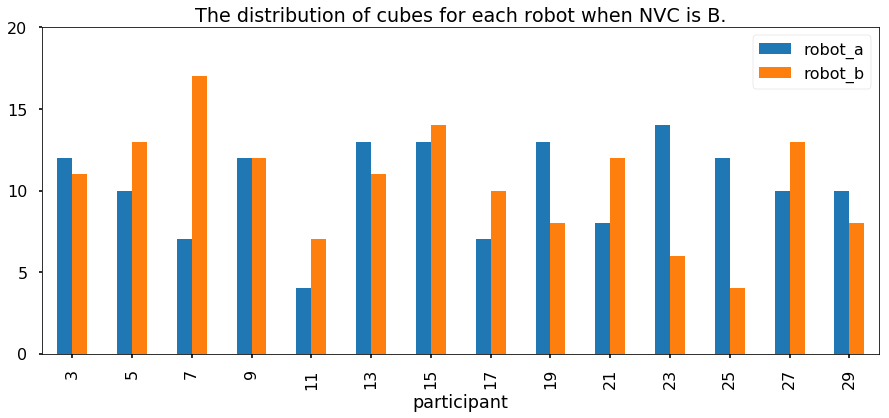

In [8]:
odd_cubes_per_participant_plot_data = odd_cubes_per_participant.drop(columns=['total_cubes'])
odd_cubes_per_participant_plot_data.plot(kind = 'bar', figsize=(15,6), 
                                         title="The distribution of cubes for each robot when NVC is B.", 
                                         yticks=range(0,25,5))

# Participants which had robotA as NVC

In [9]:
even_cubes_per_participant.head()

,robot_a,robot_b,total_cubes
participant,,,
2,8,8,16
6,1,17,18
8,10,12,22
10,8,15,23
12,9,3,12


In [10]:
even_cubes_per_participant.sum()

robot_a         86
robot_b        124
total_cubes    210
dtype: int64

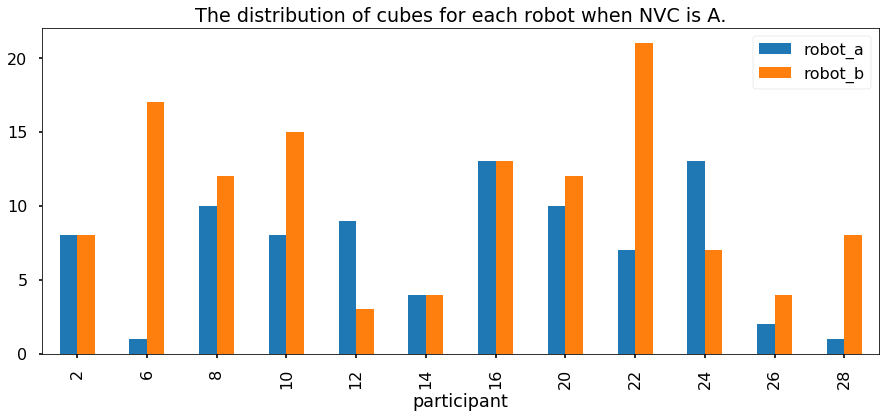

In [11]:
even_cubes_per_participant_plot_data = even_cubes_per_participant.drop(columns=['total_cubes'])
even_cubes_per_participant_plot_data.plot(kind = 'bar', figsize=(15,6), title="The distribution of cubes for each robot when NVC is A.", yticks=range(0,25,5))

# NVC-B group by scene

In [85]:
odd_participants_by_scene = odd_participants_data.groupby("scene").sum().drop(columns=['participant', 'NVC_A', 'NVC_B'])
odd_participants_by_scene

,robot_a,robot_b
scene,,
1,21,30
2,30,38
3,49,38
4,45,40


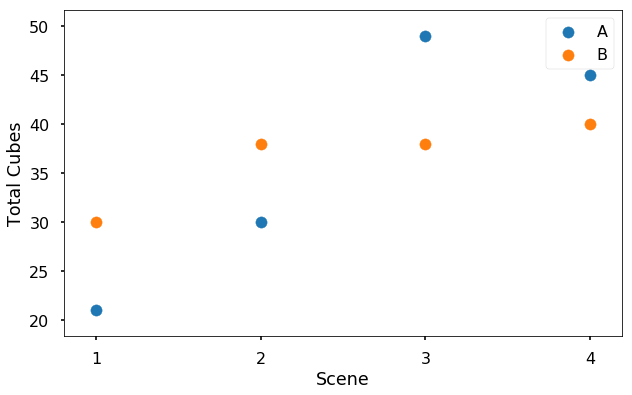

In [13]:
plt.figure(figsize=(10,6))
plt.xticks(range(1,5))
plt.yticks(range(0,70,5))
plt.scatter(odd_participants_by_scene.index, odd_participants_by_scene["robot_a"], label="A")
plt.scatter(odd_participants_by_scene.index, odd_participants_by_scene["robot_b"], label="B")
plt.xlabel('Scene')
plt.ylabel('Total Cubes')
plt.legend()
plt.show()

# NVC-A group by scene

In [14]:
even_participants_by_scene = even_participants_data.groupby("scene").sum().drop(columns=['participant']).drop(columns=['NVC_A']).drop(columns=['NVC_B'])
even_participants_by_scene

,robot_a,robot_b
scene,,
1,20,12
2,14,39
3,26,31
4,26,42


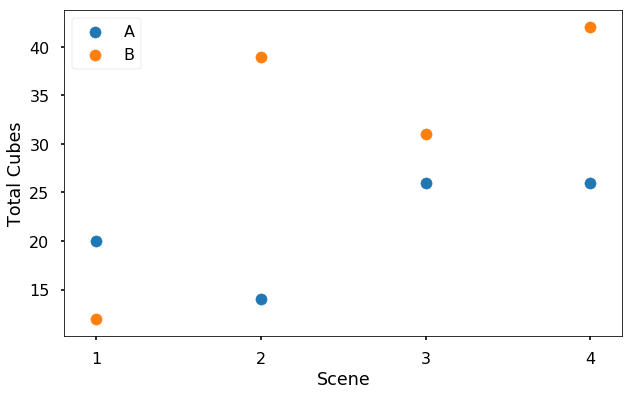

In [15]:
plt.figure(figsize=(10,6))
plt.xticks(range(1,5))
plt.yticks(range(0,70,5))
plt.scatter(even_participants_by_scene.index, even_participants_by_scene["robot_a"], label="A")
plt.scatter(even_participants_by_scene.index, even_participants_by_scene["robot_b"], label="B")
plt.xlabel('Scene')
plt.ylabel('Total Cubes')
plt.legend()
plt.show()

Text(0,0.5,'total cubes')

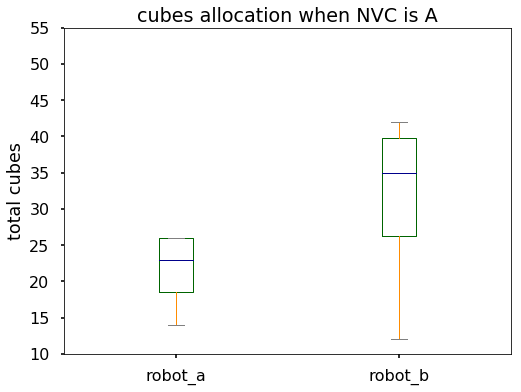

In [16]:
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange','medians': 'DarkBlue', 'caps': 'Gray'}
ax = even_participants_by_scene.plot(kind = 'box', color = color, sym='', figsize=(8,6), yticks=range(10,60,5),
                                    title = "cubes allocation when NVC is A")
ax.set_ylabel("total cubes")

Text(0,0.5,'total cubes ')

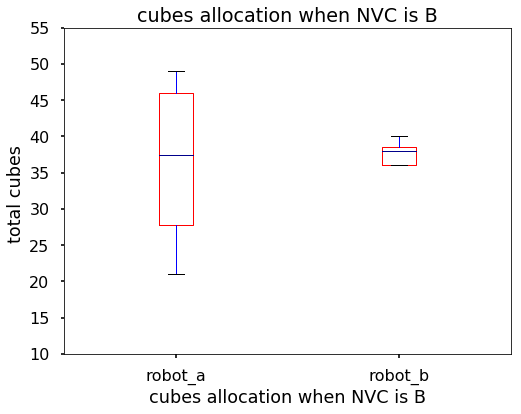

In [17]:
color = {'boxes': 'Red', 'whiskers': 'Blue','medians': 'DarkBlue', 'caps': 'Black'}
ax = odd_participants_by_scene.plot(kind = 'box', color = color, sym='', figsize=(8,6),yticks=range(10,60,5),
                                    title = "cubes allocation when NVC is B")
ax.set_xlabel("cubes allocation when NVC is B")
ax.set_ylabel("total cubes ")

In [18]:
odd_participants_data.groupby(["participant", "scene"]).sum().head()

robot_a  robot_b  NVC_A  NVC_B
participant scene                                
3           1            1        2  False   True
            2            3        3  False   True
            3            4        3  False   True
            4            4        3  False   True
5           1            3        2  False   True

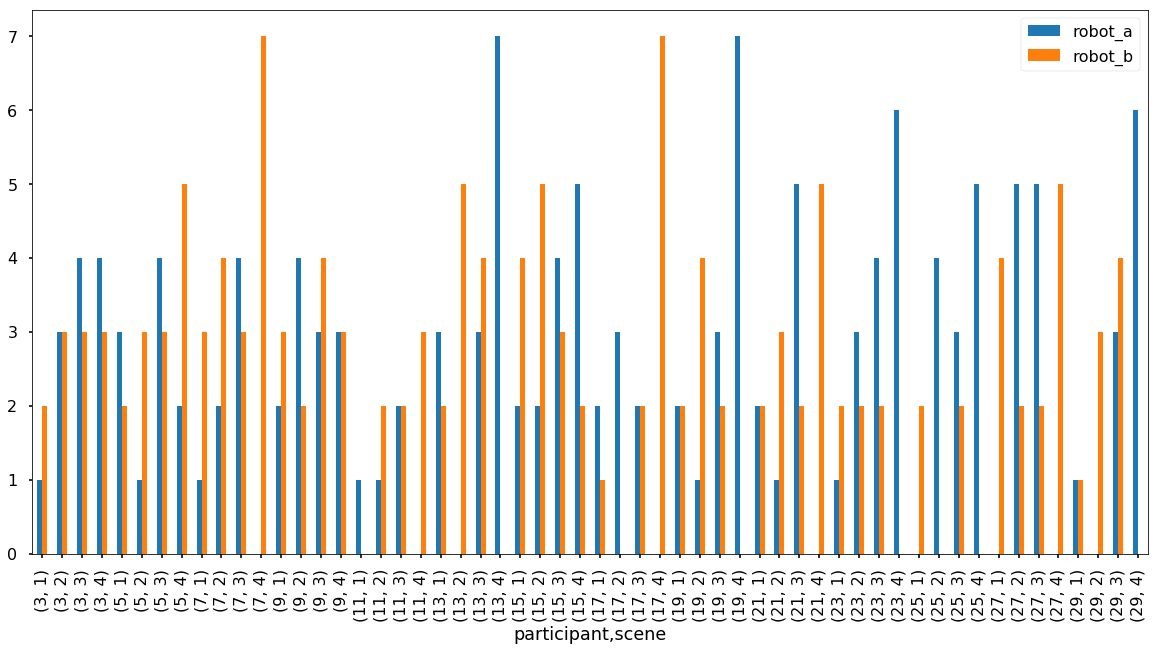

In [19]:
odd_participants_data.groupby(["participant", "scene"]).sum().plot(kind='bar', figsize=(20,10), by='participant')

In [20]:
even_participants_data.groupby(["participant", "scene"]).sum().head()

robot_a  robot_b  NVC_A  NVC_B
participant scene                                
2           1            2        1   True  False
            2            2        2   True  False
            3            0        3   True  False
            4            4        2   True  False
6           1            0        0   True  False

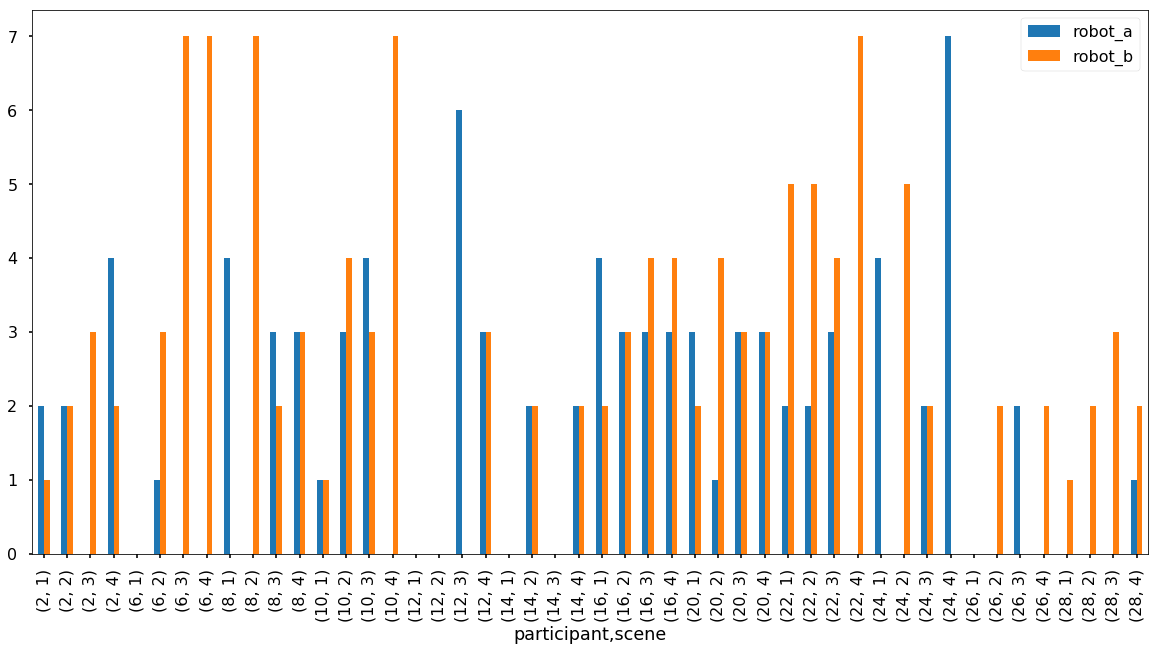

In [21]:
even_participants_data.groupby(["participant", "scene"]).sum().plot(kind='bar', figsize=(20,10))

# Separating data scene wise for participants where NVC is B

In [22]:
#odds_scene_0 = odd_participants_data[(odd_participants_data["scene"] == 0)]
odds_scene_1 = odd_participants_data[(odd_participants_data["scene"] == 1)]
odds_scene_2 = odd_participants_data[(odd_participants_data["scene"] == 2)]
odds_scene_3 = odd_participants_data[(odd_participants_data["scene"] == 3)]
odds_scene_4 = odd_participants_data[(odd_participants_data["scene"] == 4)]

# Cubes when NVC is B (scene 1 and 2)

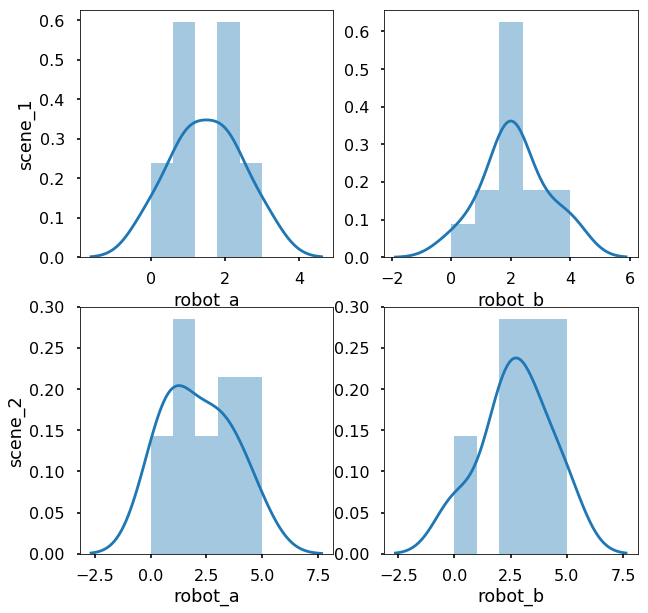

In [23]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

ax[0][0].set_ylabel("scene_1")
ax[1][0].set_ylabel("scene_2")
sns.distplot(odds_scene_1["robot_a"], bins=5, ax=ax[0][0])
sns.distplot(odds_scene_1["robot_b"], bins=5, ax=ax[0][1])
sns.distplot(odds_scene_2["robot_a"], bins=5, ax=ax[1][0])
sns.distplot(odds_scene_2["robot_b"], bins=5, ax=ax[1][1])

# Cubes when NVC is B (scene 3 and 4)

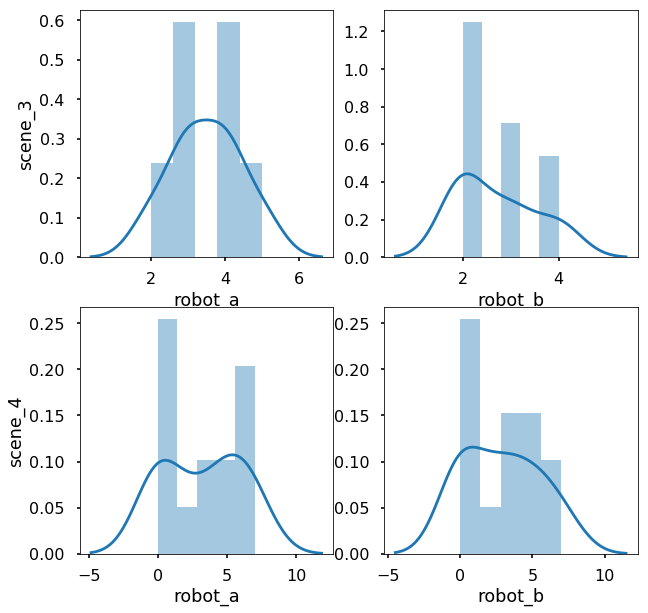

In [24]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

ax[0][0].set_ylabel("scene_3")
ax[1][0].set_ylabel("scene_4")
sns.distplot(odds_scene_3["robot_a"], bins=5, ax=ax[0][0])
sns.distplot(odds_scene_3["robot_b"], bins=5, ax=ax[0][1])
sns.distplot(odds_scene_4["robot_a"], bins=5, ax=ax[1][0])
sns.distplot(odds_scene_4["robot_b"], bins=5, ax=ax[1][1])

In [25]:
stats.normaltest(odds_scene_1["robot_a"])

/informatik2/students/home/8bhatia/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=1.2254017609885293, pvalue=0.5418853233335272)

In [26]:
stats.normaltest(odds_scene_1["robot_b"])

NormaltestResult(statistic=0.2544285985123998, pvalue=0.8805449522482466)

In [27]:
stats.normaltest(odds_scene_2["robot_a"])

NormaltestResult(statistic=1.0340163825715802, pvalue=0.5963019031346101)

In [28]:
stats.normaltest(odds_scene_2["robot_b"])

NormaltestResult(statistic=0.33037394516676594, pvalue=0.8477351860313554)

In [29]:
stats.normaltest(odds_scene_3["robot_a"])

NormaltestResult(statistic=1.2254017609885293, pvalue=0.5418853233335272)

In [30]:
stats.normaltest(odds_scene_3["robot_b"])

NormaltestResult(statistic=2.8089634711514266, pvalue=0.2454942544274233)

In [31]:
stats.normaltest(odds_scene_4["robot_a"])

NormaltestResult(statistic=6.3989938676927345, pvalue=0.040782715222358934)

In [32]:
stats.normaltest(odds_scene_4["robot_b"])

NormaltestResult(statistic=2.430618773844874, pvalue=0.29661823029498324)

# Wilcoxon Test

h0: there is no difference between a robot A and robot B <br>
h1: there is a difference

Scene 1

In [33]:
stats.wilcoxon(odds_scene_1["robot_a"], odds_scene_1["robot_b"])

WilcoxonResult(statistic=16.0, pvalue=0.11914143101997192)

Scene 2

In [34]:
stats.wilcoxon(odds_scene_2["robot_a"], odds_scene_2["robot_b"])

WilcoxonResult(statistic=36.0, pvalue=0.5026749865155679)

Scene 3

In [35]:
stats.wilcoxon(odds_scene_3["robot_a"], odds_scene_3["robot_b"])

WilcoxonResult(statistic=15.0, pvalue=0.04804540543759675)

scene 4

In [36]:
stats.wilcoxon(odds_scene_4["robot_a"], odds_scene_4["robot_b"])

WilcoxonResult(statistic=41.0, pvalue=0.7517555243995552)

# Conclusion

### For scene 1,2, and 4 p-value > 0.05, accept h0

### For scene 3 p-value < 0.05, reject h0

# Pair t-test

Scene 1

In [37]:
stats.ttest_rel(odds_scene_1["robot_a"], odds_scene_1["robot_b"])

Ttest_relResult(statistic=-1.6045473277966484, pvalue=0.1326012657719678)

Scene 2

In [38]:
stats.ttest_rel(odds_scene_2["robot_a"], odds_scene_2["robot_b"])

Ttest_relResult(statistic=-0.7731113434850683, pvalue=0.4532851384272234)

Scene 3

In [39]:
stats.ttest_rel(odds_scene_3["robot_a"], odds_scene_3["robot_b"])

Ttest_relResult(statistic=2.24177588207013, pvalue=0.04305600624769627)

Scene 4

In [40]:
stats.ttest_rel(odds_scene_4["robot_a"], odds_scene_4["robot_b"])

Ttest_relResult(statistic=0.25074854081651127, pvalue=0.8059280333121772)

### Conclusion
#### Scene 1, 2, 4 p-value >= 0.05, accept h0: There is no difference between a robot A and a robot B
#### Scene 3 p-value < 0.05, reject h0: There is a difference between a robot A and a robot B

# Separating data scene wise for participants where NVC is A

In [41]:
#evens_scene_0 = even_participants_data[(even_participants_data["scene"] == 0)]
evens_scene_1 = even_participants_data[(even_participants_data["scene"] == 1)]
evens_scene_2 = even_participants_data[(even_participants_data["scene"] == 2)]
evens_scene_3 = even_participants_data[(even_participants_data["scene"] == 3)]
evens_scene_4 = even_participants_data[(even_participants_data["scene"] == 4)]

# Cubes when NVC is A (scene 1 and 2)

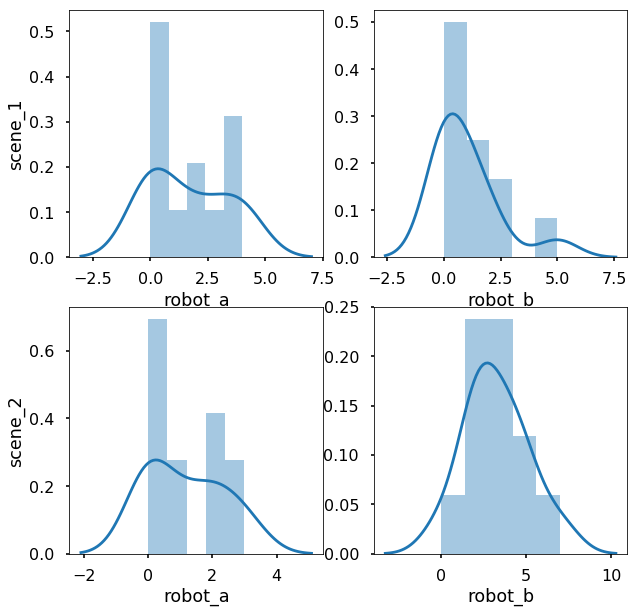

In [42]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

ax[0][0].set_ylabel("scene_1")
ax[1][0].set_ylabel("scene_2")
sns.distplot(evens_scene_1["robot_a"], bins=5, ax=ax[0][0])
sns.distplot(evens_scene_1["robot_b"], bins=5, ax=ax[0][1])
sns.distplot(evens_scene_2["robot_a"], bins=5, ax=ax[1][0])
sns.distplot(evens_scene_2["robot_b"], bins=5, ax=ax[1][1])

# Cubes when NVC is A (scene 3 and 4)

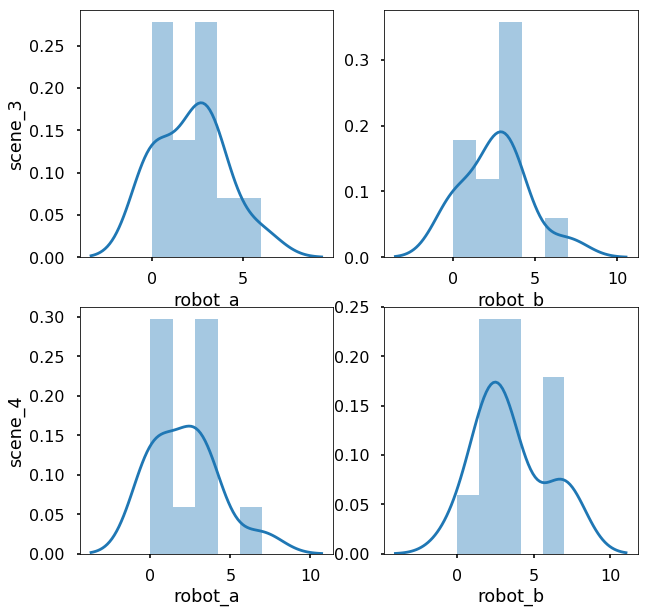

In [43]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

ax[0][0].set_ylabel("scene_3")
ax[1][0].set_ylabel("scene_4")
sns.distplot(evens_scene_3["robot_a"], bins=5, ax=ax[0][0])
sns.distplot(evens_scene_3["robot_b"], bins=5, ax=ax[0][1])
sns.distplot(evens_scene_4["robot_a"], bins=5, ax=ax[1][0])
sns.distplot(evens_scene_4["robot_b"], bins=5, ax=ax[1][1])

In [44]:
stats.normaltest(evens_scene_1["robot_a"])

/informatik2/students/home/8bhatia/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=4.363459678085017, pvalue=0.11284615601936583)

In [45]:
stats.normaltest(evens_scene_1["robot_b"])

NormaltestResult(statistic=14.895860396201023, pvalue=0.0005826463274780163)

In [46]:
stats.normaltest(evens_scene_2["robot_a"])

NormaltestResult(statistic=2.7786147081372046, pvalue=0.2492478853898132)

In [47]:
stats.normaltest(evens_scene_2["robot_b"])

NormaltestResult(statistic=0.6439344392720094, pvalue=0.7247219465897359)

In [48]:
stats.normaltest(evens_scene_3["robot_a"])

NormaltestResult(statistic=0.3965663962110003, pvalue=0.8201375588438174)

In [49]:
stats.normaltest(evens_scene_3["robot_b"])

NormaltestResult(statistic=1.5378704490919577, pvalue=0.4635063358242236)

In [50]:
stats.normaltest(evens_scene_4["robot_a"])

NormaltestResult(statistic=2.9444355572027887, pvalue=0.22941612639704878)

In [51]:
stats.normaltest(evens_scene_4["robot_b"])

NormaltestResult(statistic=1.2174686631607403, pvalue=0.5440390064953051)

# Wilcoxon Test when NVC A

h0: there is no difference between a robot A and robot B <br>
h1: there is a difference

Scene 1

In [52]:
stats.wilcoxon(evens_scene_1["robot_a"], evens_scene_1["robot_b"])

/informatik2/students/home/8bhatia/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


WilcoxonResult(statistic=7.0, pvalue=0.23250769389683978)

Scene 2

In [53]:
stats.wilcoxon(evens_scene_2["robot_a"], evens_scene_2["robot_b"])

WilcoxonResult(statistic=0.0, pvalue=0.011209733383895203)

Scene 3

In [54]:
stats.wilcoxon(evens_scene_3["robot_a"], evens_scene_3["robot_b"])

WilcoxonResult(statistic=18.0, pvalue=0.59034665908573)

Scene 4

In [106]:
stats.wilcoxon(evens_scene_4["robot_a"], evens_scene_4["robot_b"])

WilcoxonResult(statistic=10.0, pvalue=0.25550882029402844)


/informatik2/students/home/8bhatia/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


# Conclusion

### For scene 1,3, and 4 p-value > 0.05, accept h0

### For scene 2 p-value < 0.05, reject h0

# Pair t-test

Scene 1

In [56]:
stats.ttest_rel(evens_scene_1["robot_a"], evens_scene_1["robot_b"])

Ttest_relResult(statistic=1.1726039399558572, pvalue=0.26572321149777295)

Scene 2

In [57]:
stats.ttest_rel(evens_scene_2["robot_a"], evens_scene_2["robot_b"])

Ttest_relResult(statistic=-3.290406001323136, pvalue=0.007199535591677793)

Scene 3

In [58]:
stats.ttest_rel(evens_scene_3["robot_a"], evens_scene_3["robot_b"])

Ttest_relResult(statistic=-0.4586998024839076, pvalue=0.6553800840516767)

Scene 4

In [59]:
stats.ttest_rel(evens_scene_4["robot_a"], evens_scene_4["robot_b"])

Ttest_relResult(statistic=-1.1272790793515517, pvalue=0.28361399885475835)

### Conclusion
#### Scene 1, 3, 4 p-value >= 0.05, accept h0: There is no difference between a robot A and a robot B
#### Scene 2 p-value < 0.05, reject h0: There is a difference between a robot A and a robot B

# Separating the data for eye color

In [60]:
swap_heads_id = 26

In [64]:
def separate_red_yellow_eyes_data(data, swap_heads_id):
    red_eye_on_A = data[data['participant'] <= swap_heads_id]
    yellow_eye_on_A = data[data['participant'] > swap_heads_id]
    
    return red_eye_on_A, yellow_eye_on_A

# Separating data for NVC and non NVCs

In [63]:
## separates nv and non nvc data with scene number >= scene_num
def separate_NVC_nonNVC(data, scene_num):
    odd_participants_data = data[data["participant"] % 2 != 0]
    odd_participants_data = odd_participants_data[odd_participants_data["scene"] >= scene_num]
    
    even_participants_data = data[data["participant"] % 2 == 0]
    even_participants_data = even_participants_data[even_participants_data["scene"] >= scene_num]
    
    return even_participants_data, odd_participants_data

In [65]:
red, yellow = separate_red_yellow_eyes_data(raw_data, swap_heads_id)

In [74]:
even_data, odd_data = separate_NVC_nonNVC(yellow, 1)

In [80]:
## takes a list of colums to be dropped and return clean data
def drop_colums(data, column_list):
    clean_data = data.drop(columns=column_list)
    return clean_data

In [103]:
## takes a list of column names and group them
def group_data(data, group_list):
    groupped_data = data.groupby(group_list).sum()
    return groupped_data